# Visualizing linear relationships

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We previously discussed functions that can accomplish this by showing the joint distribution of two variables. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. The functions discussed in this chapter will do so through the common framework of linear regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

In [2]:
sns.set(color_codes=True)
tips = sns.load_dataset("tips")

## linear regression models

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

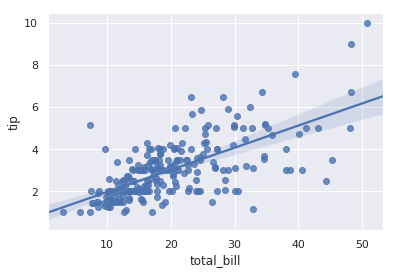

In [3]:
sns.regplot(x="total_bill", y="tip", data=tips);

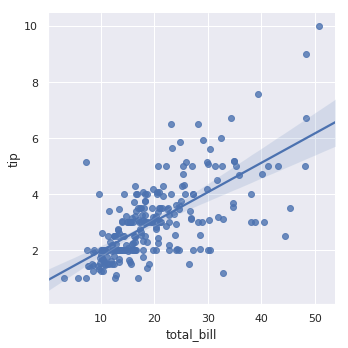

In [4]:
sns.lmplot(x="total_bill", y="tip", data=tips);

You should note that the resulting plots are identical, except that the figure shapes are different. We will explain why this is shortly. For now, the other main difference to know about is that regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. This data format is called “long-form” or “tidy” data. Other than this input flexibility, regplot() possesses a subset of lmplot()’s features, so we will demonstrate them using the latter.

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?” This is where the difference between regplot() and lmplot() appears. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

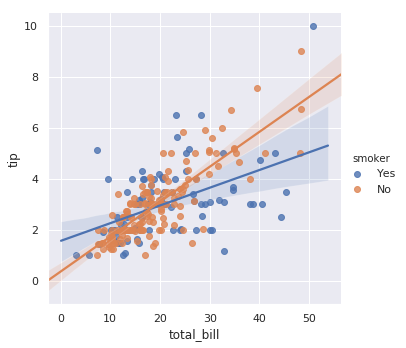

In [5]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid:

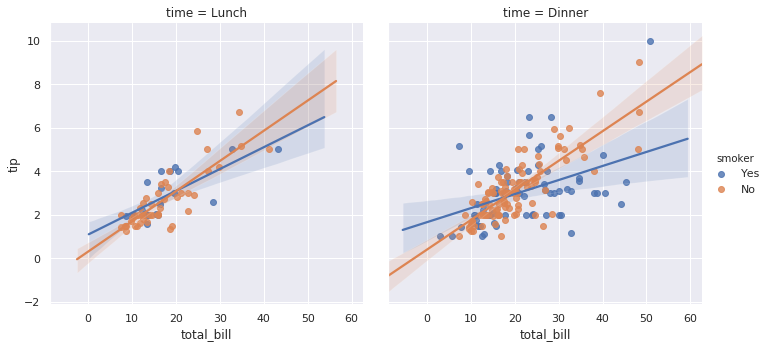

In [6]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

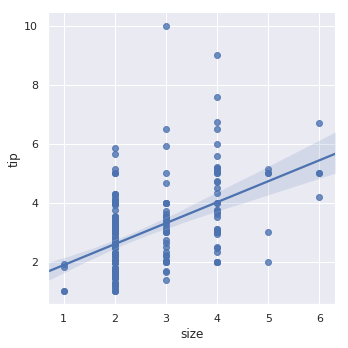

In [7]:
sns.lmplot(x="size", y="tip", data=tips);

A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

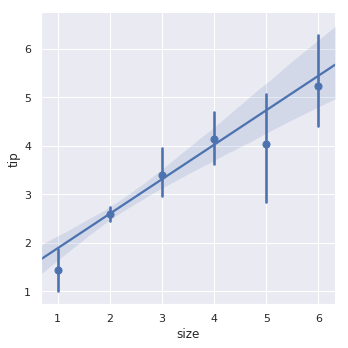

In [8]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Non-Linear Regression Models

In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

In [10]:
anscombe = sns.load_dataset("anscombe")

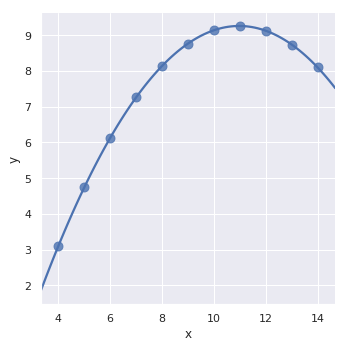

In [17]:
#sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=1, ci=None, scatter_kws={"s": 80});
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

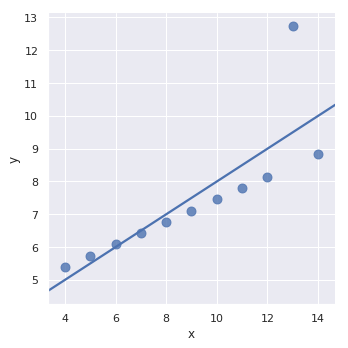

In [20]:
#sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=False, ci=None, scatter_kws={"s": 80});
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80});